In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Bangalore_prices.csv")

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.drop(["area_type","availability","society","balcony"],axis=1,inplace=True)

In [6]:
df.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
inter=df.dropna()

In [9]:
inter.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
inter.shape

(13246, 5)

In [11]:
inter["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
inter["BHK"]=inter["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Rohit Bhaskar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
inter.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [14]:
inter.drop("size",axis=1,inplace=True)

C:\Users\Rohit Bhaskar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
inter.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [16]:
inter["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# here 1133-1384 is problem

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
inter[~inter["total_sqft"].apply(lambda x: is_float(x))].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [20]:
def cleaning(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
cleaning("10 - 20")

15.0

In [22]:
cleaning("20")

20.0

In [23]:
cleaning("34.46Sq. Meter")

In [24]:
interval=inter.copy()
interval["total_sqft"]=interval["total_sqft"].apply(cleaning)

In [25]:
interval.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [26]:
interval.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [27]:
interval.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [28]:
interval.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [29]:
df1=interval.copy()

In [30]:
df1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [31]:
df1["Per_sf"]=df1["price"]*100000/df1["total_sqft"]

In [32]:
df1.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Per_sf            NaN
Name: 410, dtype: object

In [33]:
df1.head()

,location,total_sqft,bath,price,BHK,Per_sf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [34]:
df1["location"]=df1["location"].apply(lambda x: x.strip())

In [35]:
loc_stats=df1.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [36]:
loc_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [37]:
loc_stats_less_than_10=loc_stats[loc_stats<=10]

In [38]:
loc_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [39]:
len(loc_stats_less_than_10)

1052

In [40]:
len(loc_stats)

1293

In [41]:
df1.location=df1.location.apply(lambda x: "others" if x in loc_stats_less_than_10 else x)

In [42]:
df1.head(10)

,location,total_sqft,bath,price,BHK,Per_sf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,others,1020.0,6.0,370.00,6,36274.509804


In [43]:
len(loc_stats)

1293

In [44]:
len(loc_stats_less_than_10)

1052

In [45]:
len(df1.location.unique())

242

In [46]:
df1[df1.total_sqft/df1.BHK<300].head()

,location,total_sqft,bath,price,BHK,Per_sf
9,others,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,others,500.0,3.0,100.0,3,20000.000000


In [47]:
df2=df1[~(df1.total_sqft/df1.BHK<300)]

In [48]:
df1.shape

(13246, 6)

In [49]:
df2.shape

(12502, 6)

In [50]:
df2.Per_sf.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Per_sf, dtype: float64

In [51]:
def outliers(df):
    df_out=pd.DataFrame()
    for key,desc in df2.groupby("location"):
        m=np.mean(desc.Per_sf)
        sd=np.std(desc.Per_sf)
        reduced_df=desc[(desc.Per_sf>(m-sd)) & (desc.Per_sf<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df3=outliers(df2)
df3.shape

(10241, 6)

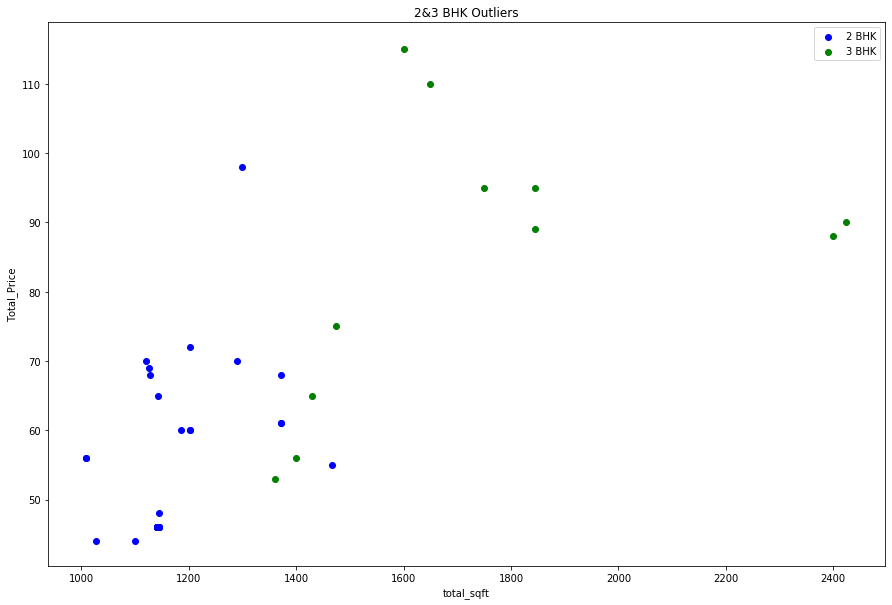

In [52]:
def visual(df,location):
    BHK2=df[(df.location==location) & (df.BHK==2)]
    BHK3=df[(df.location==location) & (df.BHK==3)]
    plt.rcParams["figure.figsize"]=(15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color="Blue",label="2 BHK")
    plt.scatter(BHK3.total_sqft,BHK3.price,color="Green",label="3 BHK")
    plt.xlabel("total_sqft")
    plt.ylabel("Total_Price")
    plt.title("2&3 BHK Outliers")
    plt.legend()
visual(df3,"HSR Layout")

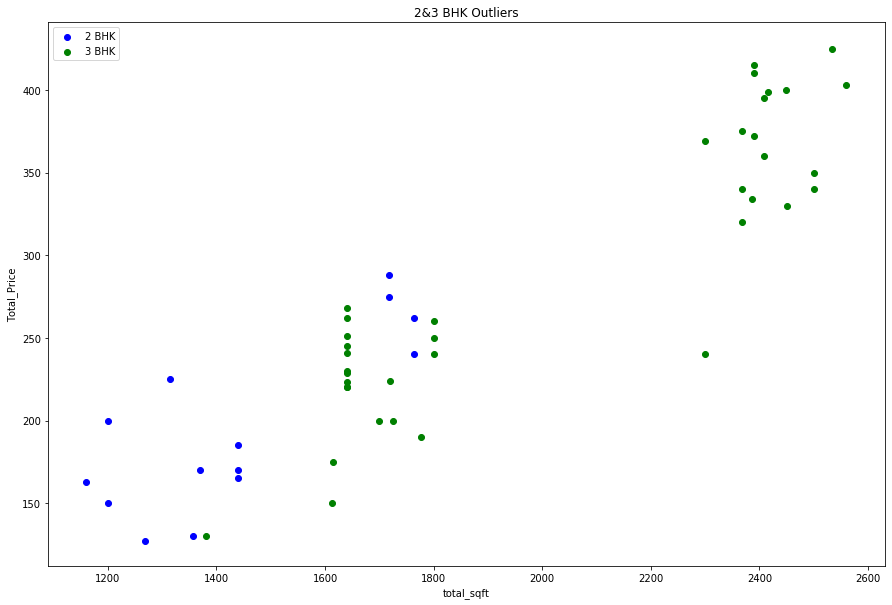

In [53]:
visual(df3,"Rajaji Nagar")

In [54]:
df3.shape

(10241, 6)

In [55]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_sf),
                'std': np.std(bhk_df.Per_sf),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_sf<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(7329, 6)

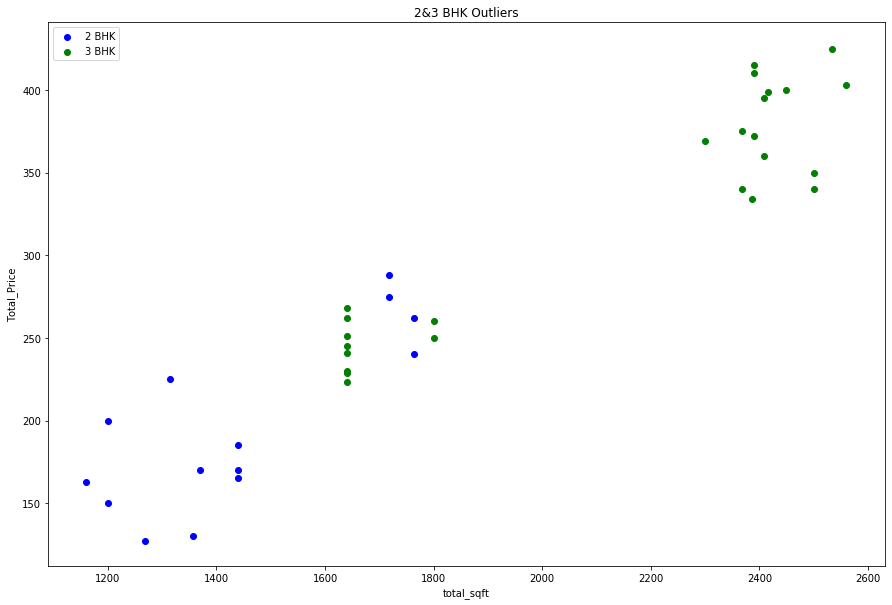

In [56]:
visual(df4,"Rajaji Nagar")

(array([ 548., 3591., 2300.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <a list of 10 Patch objects>)

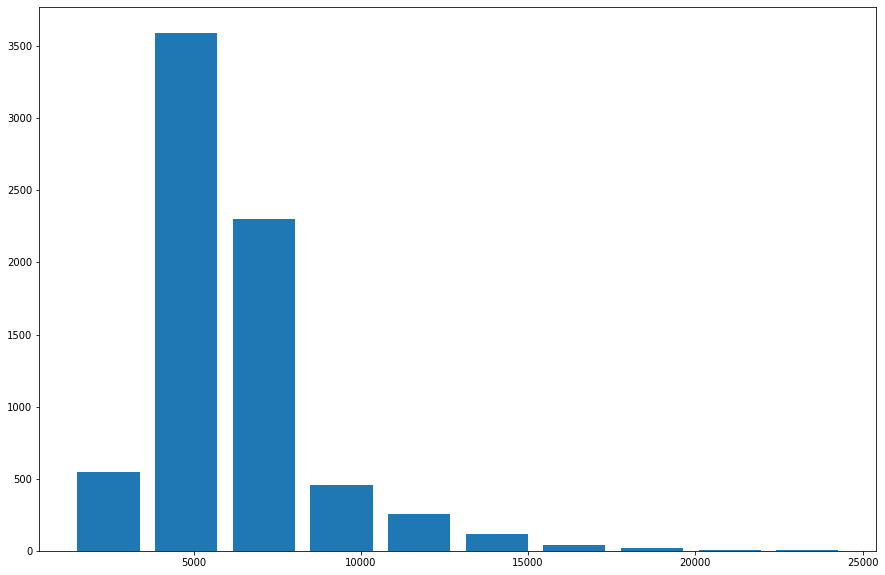

In [57]:
plt.hist(df4.Per_sf,rwidth=0.8)

In [58]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
df4[df4.bath>10]

,location,total_sqft,bath,price,BHK,Per_sf
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,others,12000.0,12.0,525.0,10,4375.000000
8575,others,10000.0,16.0,550.0,16,5500.000000
9308,others,6000.0,12.0,150.0,11,2500.000000
9639,others,5425.0,13.0,275.0,13,5069.124424


(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

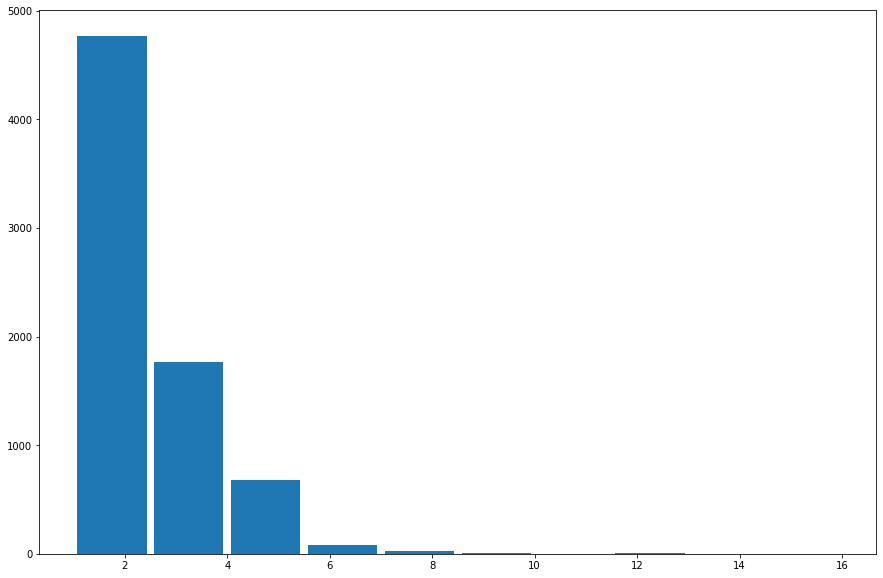

In [60]:
plt.hist(df4.bath,rwidth=0.9)

In [61]:
df4[df4.bath>df4.BHK+2]

,location,total_sqft,bath,price,BHK,Per_sf
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,others,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df5=df4[df4.bath<df4.BHK+2]

In [63]:
df5.shape

(7251, 6)

In [64]:
final=df5.drop("Per_sf",axis=1)

In [65]:
final.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [66]:
final.shape

(7251, 5)

In [67]:
#Cool

In [68]:
len(final.location.unique())

242

In [69]:
dummies=pd.get_dummies(final.location)

In [70]:
df5=pd.concat([final,dummies.drop("others",axis=1)],axis=1)

In [71]:
df5.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df5.drop("location",axis=1,inplace=True)

In [73]:
df5.shape

(7251, 245)

In [74]:
x=df5.drop("price",axis=1)
y=df5.price

In [75]:
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [79]:
len(X_train)

5800

In [80]:
len(X_test)

1451

In [81]:
from sklearn import linear_model

In [82]:
model=linear_model.LinearRegression()

In [83]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
model.score(X_test,y_test)

0.845227769787428

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [86]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
a=cross_val_score(linear_model.LinearRegression(),x,y,cv=cv)

In [87]:
np.mean(a)

0.8473750758555374

In [88]:
a

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [89]:
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [90]:
#Hyperparameter tuning

In [91]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.847375,{'normalize': True}
1,lasso,0.713025,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.685418,"{'criterion': 'mse', 'splitter': 'random'}"


In [92]:
#here Linear_regression is the best model

In [93]:
def predict_price(location,total_sqft,bath,BHK):
    loc_index = np.where(x.columns==location)[0][0]
    a = np.zeros(len(x.columns))
    a[0]=total_sqft
    a[1]=bath
    a[2]=BHK
    
    if loc_index>=0:
        a[loc_index]=1
    return model.predict([a])[0]
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677167721

In [94]:
model.score(X_test,y_test)

0.845227769787428

In [95]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484007024

In [96]:
predict_price('1st Block Jayanagar',1000,2,2)

201.9919790679191

In [97]:
predict_price('Indira Nagar',1000, 2, 4)

177.7323993115763

In [98]:
#exporting model

In [99]:
import pickle

In [100]:
with open("Real_estate_prediction_model.pickle","wb") as f:
    pickle.dump(model,f)

In [101]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [102]:
#we need these colum details ,so we will import it in a json file

In [103]:
import json

In [104]:
columns={
        "data_columns": [i.lower() for i in x.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [105]:
#model buliding successful